In [1]:
import numpy as np
data = np.load('../dns_large.npy')
data.shape

(102001, 64, 64, 2)

In [2]:
data = data.transpose(0, 3, 1, 2)
data.shape

(102001, 2, 64, 64)

In [3]:
# remove to load entire dataset
data = data[:50000]
data.shape

(50000, 2, 64, 64)

In [4]:
x = data[:-1]
y = data[1:]
x.shape

(49999, 2, 64, 64)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
import numpy as np
from model import ViT
from tqdm import tqdm

In [6]:
input_data = torch.tensor(x, dtype=torch.float32)
target_data = torch.tensor(y, dtype=torch.float32)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [8]:
model = ViT(
    image_size=64,
    patch_size=4,
    output_size=64,
    dim=1024,
    depth=4,
    heads=16,
    mlp_dim=2048,
    channels=2,
    dropout=0.1,
    emb_dropout=0.1
).to(device)

In [9]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [10]:
dataset = TensorDataset(input_data, target_data)
print(dataset[0][0].shape)
dataloader = DataLoader(dataset, batch_size=128, shuffle=False)

torch.Size([2, 64, 64])


In [11]:
last_epoch = 60
if last_epoch != 0:
    checkpoint_path = f'checkpoint/model_epoch_{last_epoch}.pt'
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [15]:
num_epochs = 60
y_true = []
y_pred = []

for epoch in range(last_epoch, num_epochs):
    for batch, (x, y) in enumerate(tqdm(dataloader)):
        optimizer.zero_grad()
        x = x.to(device)
        y = y.to(device)

        # print(x.shape)
        # print(y.shape)
        outputs = model(x)
        # print("out",outputs.shape) 

        loss = criterion(outputs, y)
        if epoch == num_epochs-1:
            y_true.append(y)
            y_pred.append(outputs)
        loss.backward()
        optimizer.step()

    checkpoint_path = f'checkpoint/model_epoch_{epoch+1}.pt'
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss.item(),
    }, checkpoint_path)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

100%|██████████| 391/391 [03:25<00:00,  1.90it/s]


Epoch 31/60, Loss: 0.04893907532095909


100%|██████████| 391/391 [03:25<00:00,  1.91it/s]


Epoch 32/60, Loss: 0.04627341777086258


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 33/60, Loss: 0.04480576142668724


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 34/60, Loss: 0.044000208377838135


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 35/60, Loss: 0.04326354339718819


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 36/60, Loss: 0.04334762692451477


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 37/60, Loss: 0.03990699723362923


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 38/60, Loss: 0.038783855736255646


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 39/60, Loss: 0.03818129375576973


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 40/60, Loss: 0.03735828027129173


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 41/60, Loss: 0.03697892278432846


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 42/60, Loss: 0.03578128293156624


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 43/60, Loss: 0.03543696179986


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 44/60, Loss: 0.0339624360203743


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 45/60, Loss: 0.03419572487473488


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 46/60, Loss: 0.03341680392622948


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 47/60, Loss: 0.03418777510523796


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 48/60, Loss: 0.033303845673799515


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 49/60, Loss: 0.033460646867752075


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 50/60, Loss: 0.03271764516830444


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 51/60, Loss: 0.030979260802268982


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 52/60, Loss: 0.029670407995581627


100%|██████████| 391/391 [03:25<00:00,  1.90it/s]


Epoch 53/60, Loss: 0.029594847932457924


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 54/60, Loss: 0.029370417818427086


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 55/60, Loss: 0.028931036591529846


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 56/60, Loss: 0.029621059074997902


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 57/60, Loss: 0.028744975104928017


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 58/60, Loss: 0.02841394767165184


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 59/60, Loss: 0.027032511308789253


100%|██████████| 391/391 [03:24<00:00,  1.91it/s]


Epoch 60/60, Loss: 0.0275984238833189


In [16]:
checkpoint_path = f'checkpoint/model_epoch_{num_epochs}.pt'
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [17]:
y_true = torch.vstack(y_true)
y_true.shape

torch.Size([49999, 2, 64, 64])

In [18]:
y_pred = torch.vstack(y_pred)
# y_pred.shape

In [19]:
y_pred.shape

torch.Size([49999, 2, 64, 64])

In [20]:
np.save('y_pred.npy', (y_pred.cpu().detach().numpy()).squeeze())
np.save('y_true.npy', (y_true.cpu().detach().numpy()).squeeze())


In [2]:
y_pred = np.load('y_pred.npy')
y_true = np.load('y_true.npy')

In [3]:
def vorticity(v): #-> 64x64x2 
    v = np.transpose(v, axes=(2,0,1))
    partials = tuple(np.gradient(i) for i in v)
    jacobian = np.stack(partials).reshape(*(j := (2,) * 2), *(64,64))
    # Extract divergence and curl from jacobian.
    divergence = np.trace(jacobian)
    curl_mask = np.triu(np.ones(j, dtype=bool), k=1)
    curl = (jacobian[curl_mask] - jacobian[curl_mask.T]).squeeze()
    return curl
    

In [4]:
import matplotlib.pyplot as plt


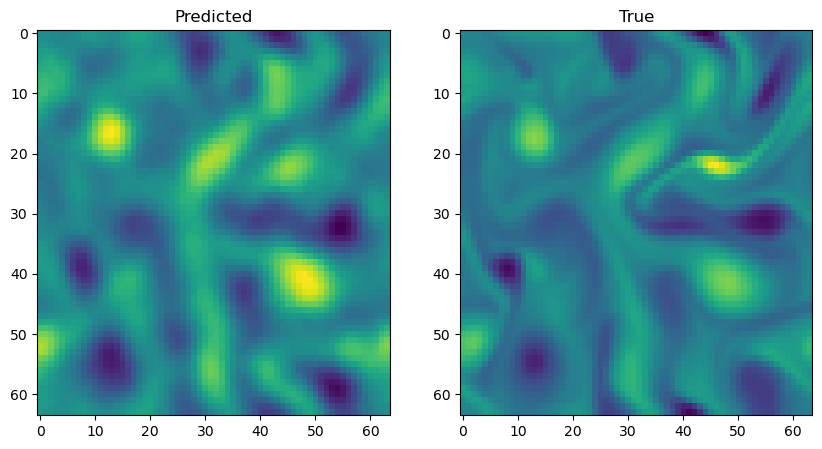

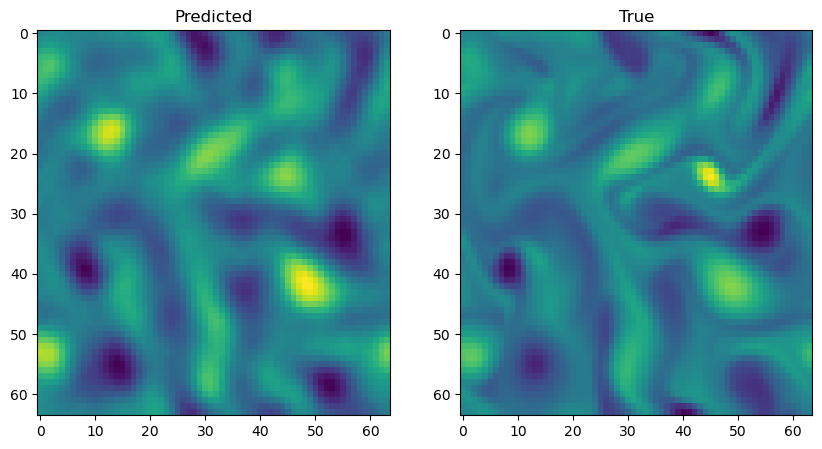

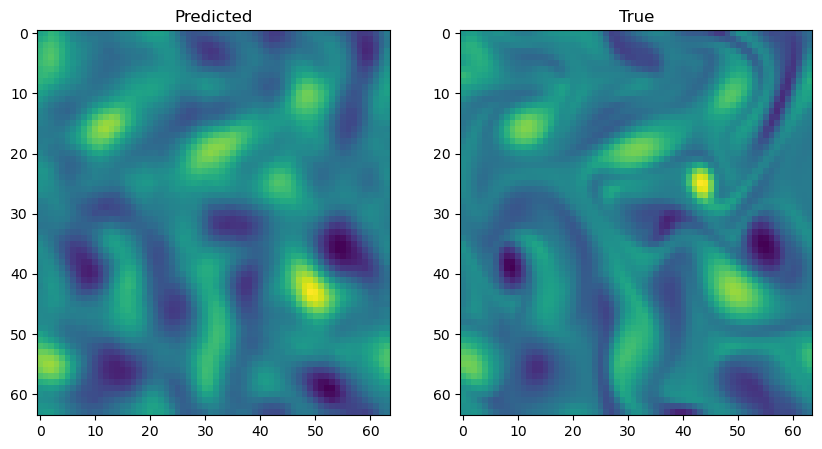

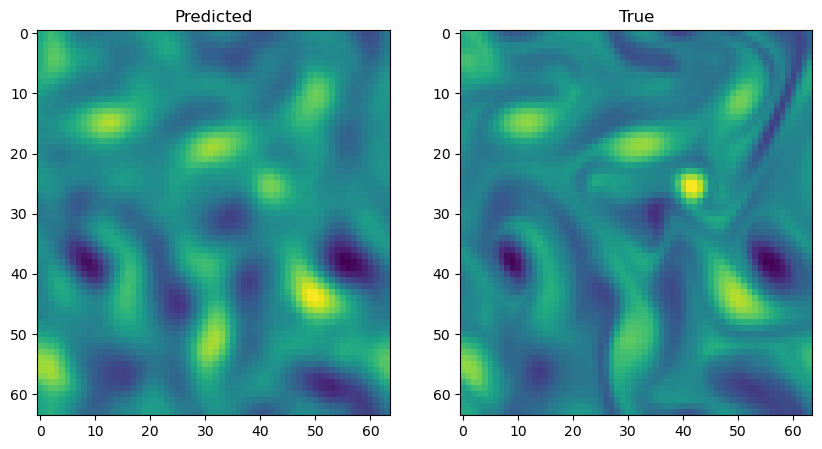

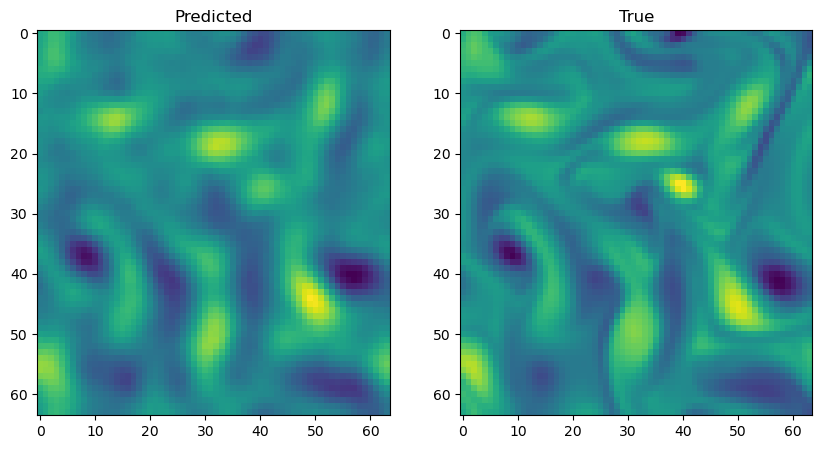

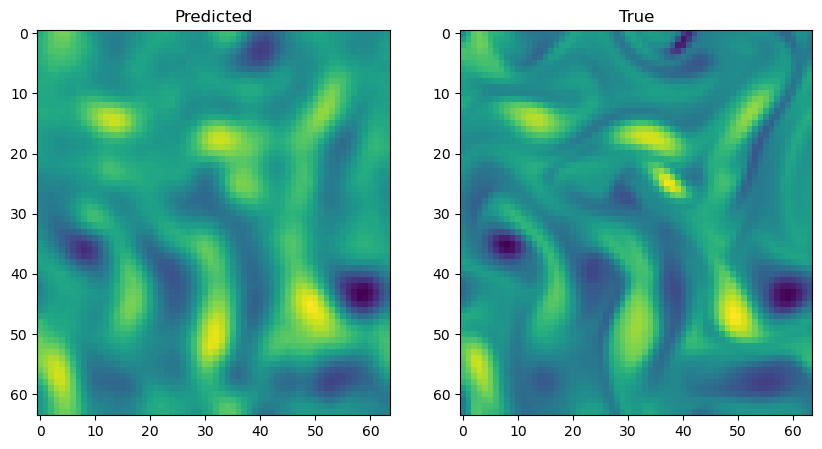

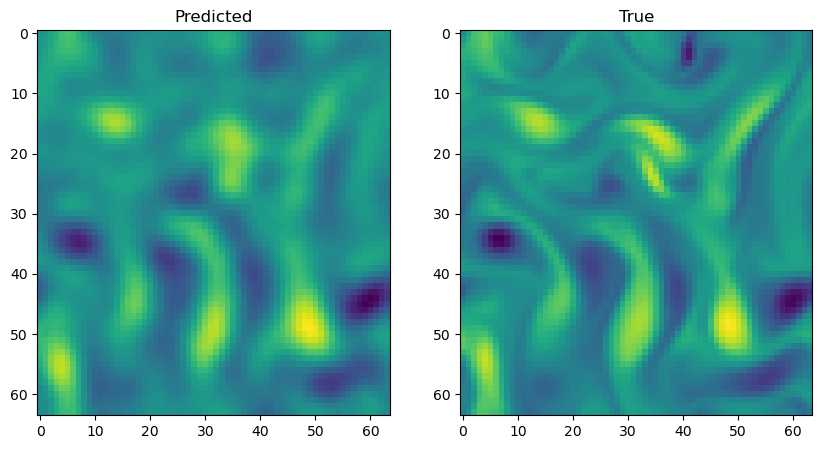

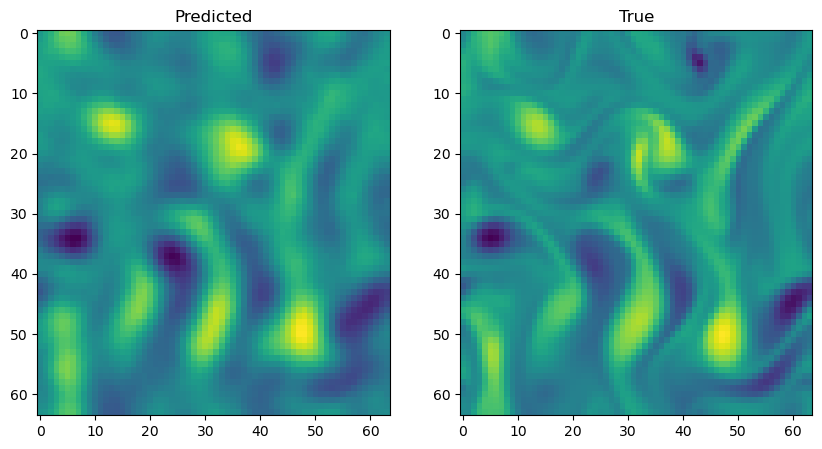

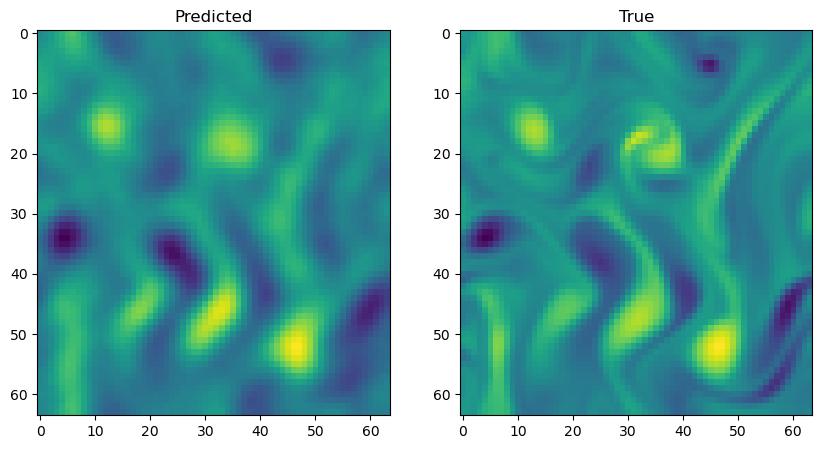

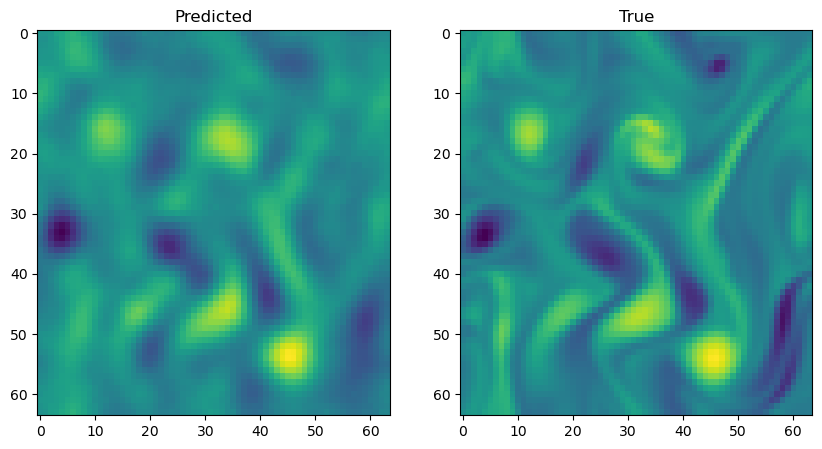

In [7]:
# for i in range(y_pred.shape[0]):
for i in range(10):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # axes[0].imshow(vorticity(((y_pred[i].cpu().detach().numpy()).squeeze()).transpose(1,2,0)), aspect="auto")
    # axes[0].set_title("Predicted")
    
    # axes[1].imshow(vorticity(((y_true[i].cpu().detach().numpy()).squeeze()).transpose(1,2,0)), aspect="auto")
    # axes[1].set_title("True")

    axes[0].imshow(vorticity(((y_pred[i]).squeeze()).transpose(1,2,0)), aspect="auto")
    axes[0].set_title("Predicted")
    
    axes[1].imshow(vorticity(((y_true[i]).squeeze()).transpose(1,2,0)), aspect="auto")
    axes[1].set_title("True")
    
    plt.show()

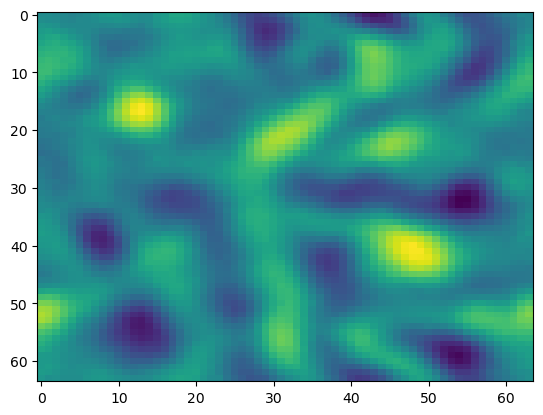

In [29]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
fig, axs = plt.subplots(dpi=100)
def animate(t):
    plt.cla()
    plt.imshow(vorticity(((y_pred[t].cpu().detach().numpy()).squeeze()).transpose(1,2,0)), aspect="auto")
    #plt.ylim([-30,30])
writer = animation.PillowWriter(fps=10,
                                metadata=dict(artist='Me'),
                                bitrate=-1)
ani = FuncAnimation(fig, animate, frames=1000)
ani.save('predicted.gif', writer=writer)

In [32]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
fig, axs = plt.subplots(dpi=100)
def animate(t):
    plt.cla()
    # plt.imshow(vorticity(((y_true[t].cpu().detach().numpy()).squeeze()).transpose(1,2,0)), aspect="auto")

    # Plot y_true
    plt.subplot(1, 2, 1)
    plt.imshow(vorticity(((y_true[t].cpu().detach().numpy()).squeeze()).transpose(1, 2, 0)), aspect="auto")
    plt.title('True')
    plt.axis('off')

    # Plot y_pred
    plt.subplot(1, 2, 2)
    plt.imshow(vorticity(((y_pred[t].cpu().detach().numpy()).squeeze()).transpose(1, 2, 0)), aspect="auto")
    plt.title('Predicted')
    plt.axis('off')
    
    #plt.ylim([-30,30])
writer = animation.PillowWriter(fps=10,
                                metadata=dict(artist='Me'),
                                bitrate=-1)
ani = FuncAnimation(fig, animate, frames=1000)
ani.save('actual2.gif', writer=writer)

In [25]:
 model.parameters

<bound method Module.parameters of ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=4, p2=4)
    (1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=32, out_features=1024, bias=True)
    (3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-3): 4 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (to_qkv): Linear(in_features=1024, out_features=3072, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=1024, out_features=1024, bias=True)
            (1): Dropout(p=0.1, inplace=False)
          )
        )
        (1): FeedForward(


In [26]:
print(sum(p.numel() for p in model.parameters()))
print(sum(dict((p.data_ptr(), p.numel()) for p in model.parameters()).values()))


42286144
42286144


In [14]:
import os
from PIL import Image

true_dir = 'data/true'
pred_dir = 'data/pred'
os.makedirs(true_dir, exist_ok=True)
os.makedirs(pred_dir, exist_ok=True)

for i in range(y_pred.shape[0]):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Save predicted image
    pred_path = os.path.join(pred_dir, f'predicted_{i}.png')
    plt.imsave(pred_path, (y_pred[i].cpu().detach().numpy()).squeeze())
    
    # Save true image
    true_path = os.path.join(true_dir, f'true_{i}.png')
    plt.imsave(true_path, (y_true[i].cpu().detach().numpy()).squeeze())
    
    plt.close(fig)
    # Save predicted image
    # pred_img = Image.fromarray((y_pred[i].cpu().detach().numpy()).squeeze())
    # pred_path = os.path.join(pred_dir, f'predicted_{i}.png')
    # print(pred_path)
    # pred_img.save(pred_path)

    # # Save true image
    # true_img = Image.fromarray((y_true[i].cpu().detach().numpy()).squeeze())
    # true_path = os.path.join(true_dir, f'true_{i}.png')
    # true_img.save(true_path)

NameError: name 'plt' is not defined